### *Cell That Contains the Main Code*

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import re

# Reads the file data and uses regex and list comprehension 
# to store each point as a dict and save it to a list
def read_data(path, expression):
    with open(path, "r") as file:
        points = list()
        for row in file:
            points.append( *[ 
                {"x":round(float(li[0]), 2), 
                 "y":round(float(li[1]), 2),} 
                for li in re.findall(expression, row)  
                ] )
    return points

    
# 1 == Above/Right of the Line,  0 == Below/Left of the Line
# When the point's y is smaller then equation's y, the point is to the left / below the line.
def determine_position(point, line):

    y = line["k"]*point["x"]+line["m"]
    p = point["y"]
    return 0 if p < y else 1

# Loops through and classifies all the points using the determine_position function
def classify_points(points, line):
     return [ obj|{ "label" : determine_position(obj, line) } for obj in points ]

# Adds a color to each point based on there label
def set_color(points):
     for obj in points:
          rtl = obj["label"]
          obj["color"] = "white" if rtl == 0 else "red" 
     return points

# This function combines all points of the same label and  
# calculates the average x, y of these points to approximate
# the center of the clusters.
def center_of_clusters(line):
    clusters = dict()
    for point in line["points"]:
        if clusters.get(point["label"], None) == None:
            clusters[point["label"]] = {"x":point["x"], "y":point["y"], "points":1}
        else:
            clusters[point["label"]]["x"]+=point["x"]
            clusters[point["label"]]["y"]+=point["y"]
            clusters[point["label"]]["points"]+=1   
    for di in clusters.values():
        di["x"] = round( di["x"]/di["points"], 2 )
        di["y"] = round( di["y"]/di["points"], 2 )
    return clusters

# Determines the ratio of points labeld 1 aka above/right side
# of the line vs the points that are labled 0 aka below/left side.
def points_ratio(line):
    zero, one = int(), int()
    [ (one:=one+1) if di["label"] == 1 else (zero:=zero+1) for di in line["points"] ]
    line["pr"] = (zero, one)
    return line


def draw_plot(line, plot_lines, title="", sample_point=None):
    fig, ax = plt.subplots( dpi=300, figsize=(18, 9)) 
    fig.set_facecolor((0.12, 0.12, 0.12))
    
    ax.set_ylim(-5.9, 5.9)
    ax.set_facecolor((0.1, 0.1, 0.1))
    ax.set_xlim(-5.9, 5.9)
    ax.tick_params(axis='x', colors=(0.8, 0.8, 0.8))
    ax.tick_params(axis='y', colors=(0.8, 0.8, 0.8))
    ax.yaxis.label.set_color((0.8, 0.8, 0.8))
    ax.xaxis.label.set_color((0.8, 0.8, 0.8))
    ax.spines['bottom'].set_color((0.8, 0.8, 0.8))
    ax.spines['left'].set_color((0.8, 0.8, 0.8))
    ax.spines['top'].set_color((0.12, 0.12, 0.12))
    ax.spines['right'].set_color((0.12, 0.12, 0.12))
    ax.set_ylabel("y", fontsize=14, color=(0.8, 0.8, 0.8))
    ax.set_xlabel("x", fontsize=14, color=(0.8, 0.8, 0.8))
    ax.set_title(title, color=line["color"], size=24, family="consolas")
    ax.grid(visible=None, which='major', axis='both', color=(0.2, 0.2, 0.2))
    
    
    props = { "boxstyle":"round", "facecolor":(0.1, 0.1, 0.1), "alpha":1, "edgecolor":(0.4, 0.4, 0.4) }
    box_txt = "\n".join([
                f".            Point Location                   .",
                f"    Red : Right / Above the Line (1)",
                f" White : Left / Belowe the Line (0)",
                f"   Gray : Center of Clusters",
                f"  Ratio : {line["pr"][0]}:{line["pr"][1]}",
                f".                                                      .",
            ])

    ax.text(-5.5 , 3.4, box_txt, color=(0.8, 0.8, 0.8), size=14, bbox=props)
    
    
    ax.scatter([point["x"] for point in line["points"]], [point["y"] for point in line["points"]], color=[point["color"] for point in line["points"]], marker=".", s=20, zorder=3)
    
    # Plotts a gray circle to mark the center of each cluster 
    if center_of_clusters:
        coc_x = [ x["x"] for x in line["center_of_clusters"].values() ]
        coc_y = [ y["y"] for y in line["center_of_clusters"].values() ]
        ax.scatter(coc_x, coc_y, color="#555555", marker=".", s=999, zorder=2)

    # Plotts a blue dot to indicate the position of a sample point
    if sample_point != None:
        x = sample_point["x"]
        y = sample_point["y"]
        c0 = sample_point["distance"][0]
        c1 = sample_point["distance"][1]
        txt = "\n".join([
                f" Location of Point   : {x}x, {y}y",
                f" Distance to Red    : {c1:.2f} ",
                f" Distance to White : {c0:.2f}",
                ])
        ax.scatter( x, y, color="#1f77b4", marker=".", s=240, zorder=2)
        ax.annotate(txt, (-5.5, 1.9), color=(0.8, 0.8, 0.8), size=14, bbox=props )

    # This loop allows for multiple plot lines
    for plot_line in plot_lines:
        x = np.linspace(-6, 6, 10)
        y = plot_line["k"]*x+plot_line["m"]
        ax.plot(x, y, label=plot_line["label"], color=plot_line["color"])
    ax.legend( fontsize=15, 
               facecolor=(0.1, 0.1, 0.1),  
               edgecolor=(0.4, 0.4, 0.4),
               labelcolor=(0.8, 0.8, 0.8),
               framealpha=1, )
    plt.show()
    plt.close()






### *Executive Cell*
This cell utilizes function from the cell above to read\
in data, convert it in to data points and finally label\
these points using the 'k' and 'm' values for each\
equation that is stored in 'lines'.


In [30]:


lines = ( 
    {"k":-1, "m":0.3, "label":"y = -1x + 0.3", "color":"#1f77b4"},
    {"k":-0.489, "m":0, "label":"f(x) = -0.489x", "color":"#ff7f0e"}, 
    {"k":-2, "m":0.16, "label":"g(x) = -2x + 0.16", "color":"#2c9f2c"}, 
    {"k":800, "m":-120, "label":"h(x) = 800x - 120", "color":"#cf2627"},
    )

points = read_data("unlabelled_data.csv", r"(.*?),(.*)")

# Creates one set of points for each line/subplot, then applies a label
# and color to the points.
# Adds the ratio of points above/below the line to each line.
# Calculates the center of the clusters.
for idx, line in enumerate(lines):
    lines[idx]["points"] = set_color( classify_points(points, line) )
    lines[idx]["points_ratio"] = points_ratio(line) 
    lines[idx]["center_of_clusters"] = center_of_clusters(line)

### *Plotting Multiple Lines*

Line 1)<span style="color:#1f77b4; font-size:15px; font-weight: bold; font-style: italic;"> y = -1x + 0.3 </span>\
Line 2)<span style="color:#ff7f0e; font-size:15px; font-weight: bold; font-style: italic;"> f(x) = - 0.489  </span>\
Line 3)<span style="color:#2c9f2c; font-size:15px; font-weight: bold; font-style: italic;"> g(x) = -2x + 0.16  </span>\
Line 4)<span style="color:#cf2627; font-size:15px; font-weight: bold; font-style: italic;"> h(x) = 800x - 120  </span>

As we can see from the graph below; my line, the blue (y), from which the data is labeld is fairly\
close to being the combined average angle of the orange (f) and the green (g) line. Much in the same\
way as the green (g) line is close to being the combined average angle of the orange (h) red (r) line.\
\
You could plot more lines but these four already covers a lot of the angles in\
between 0 and 90 degrees. And you can't venture much further outside of those angles\
without plotting your line through part of a cluster.\
So if your goal is to label the points while maintaining the shape and size of the clusters\
then it seems as though your options are rather limitded. My guess would be that a line\
plotted at another angle could lable new data points with a higher degree of accuracy\
but that the improvement woud be marginall.\
However this is simply my guess and to prove/disprove it one should probably\
build an algorithm to calculate and/or test different 'k' and 'm' values. 


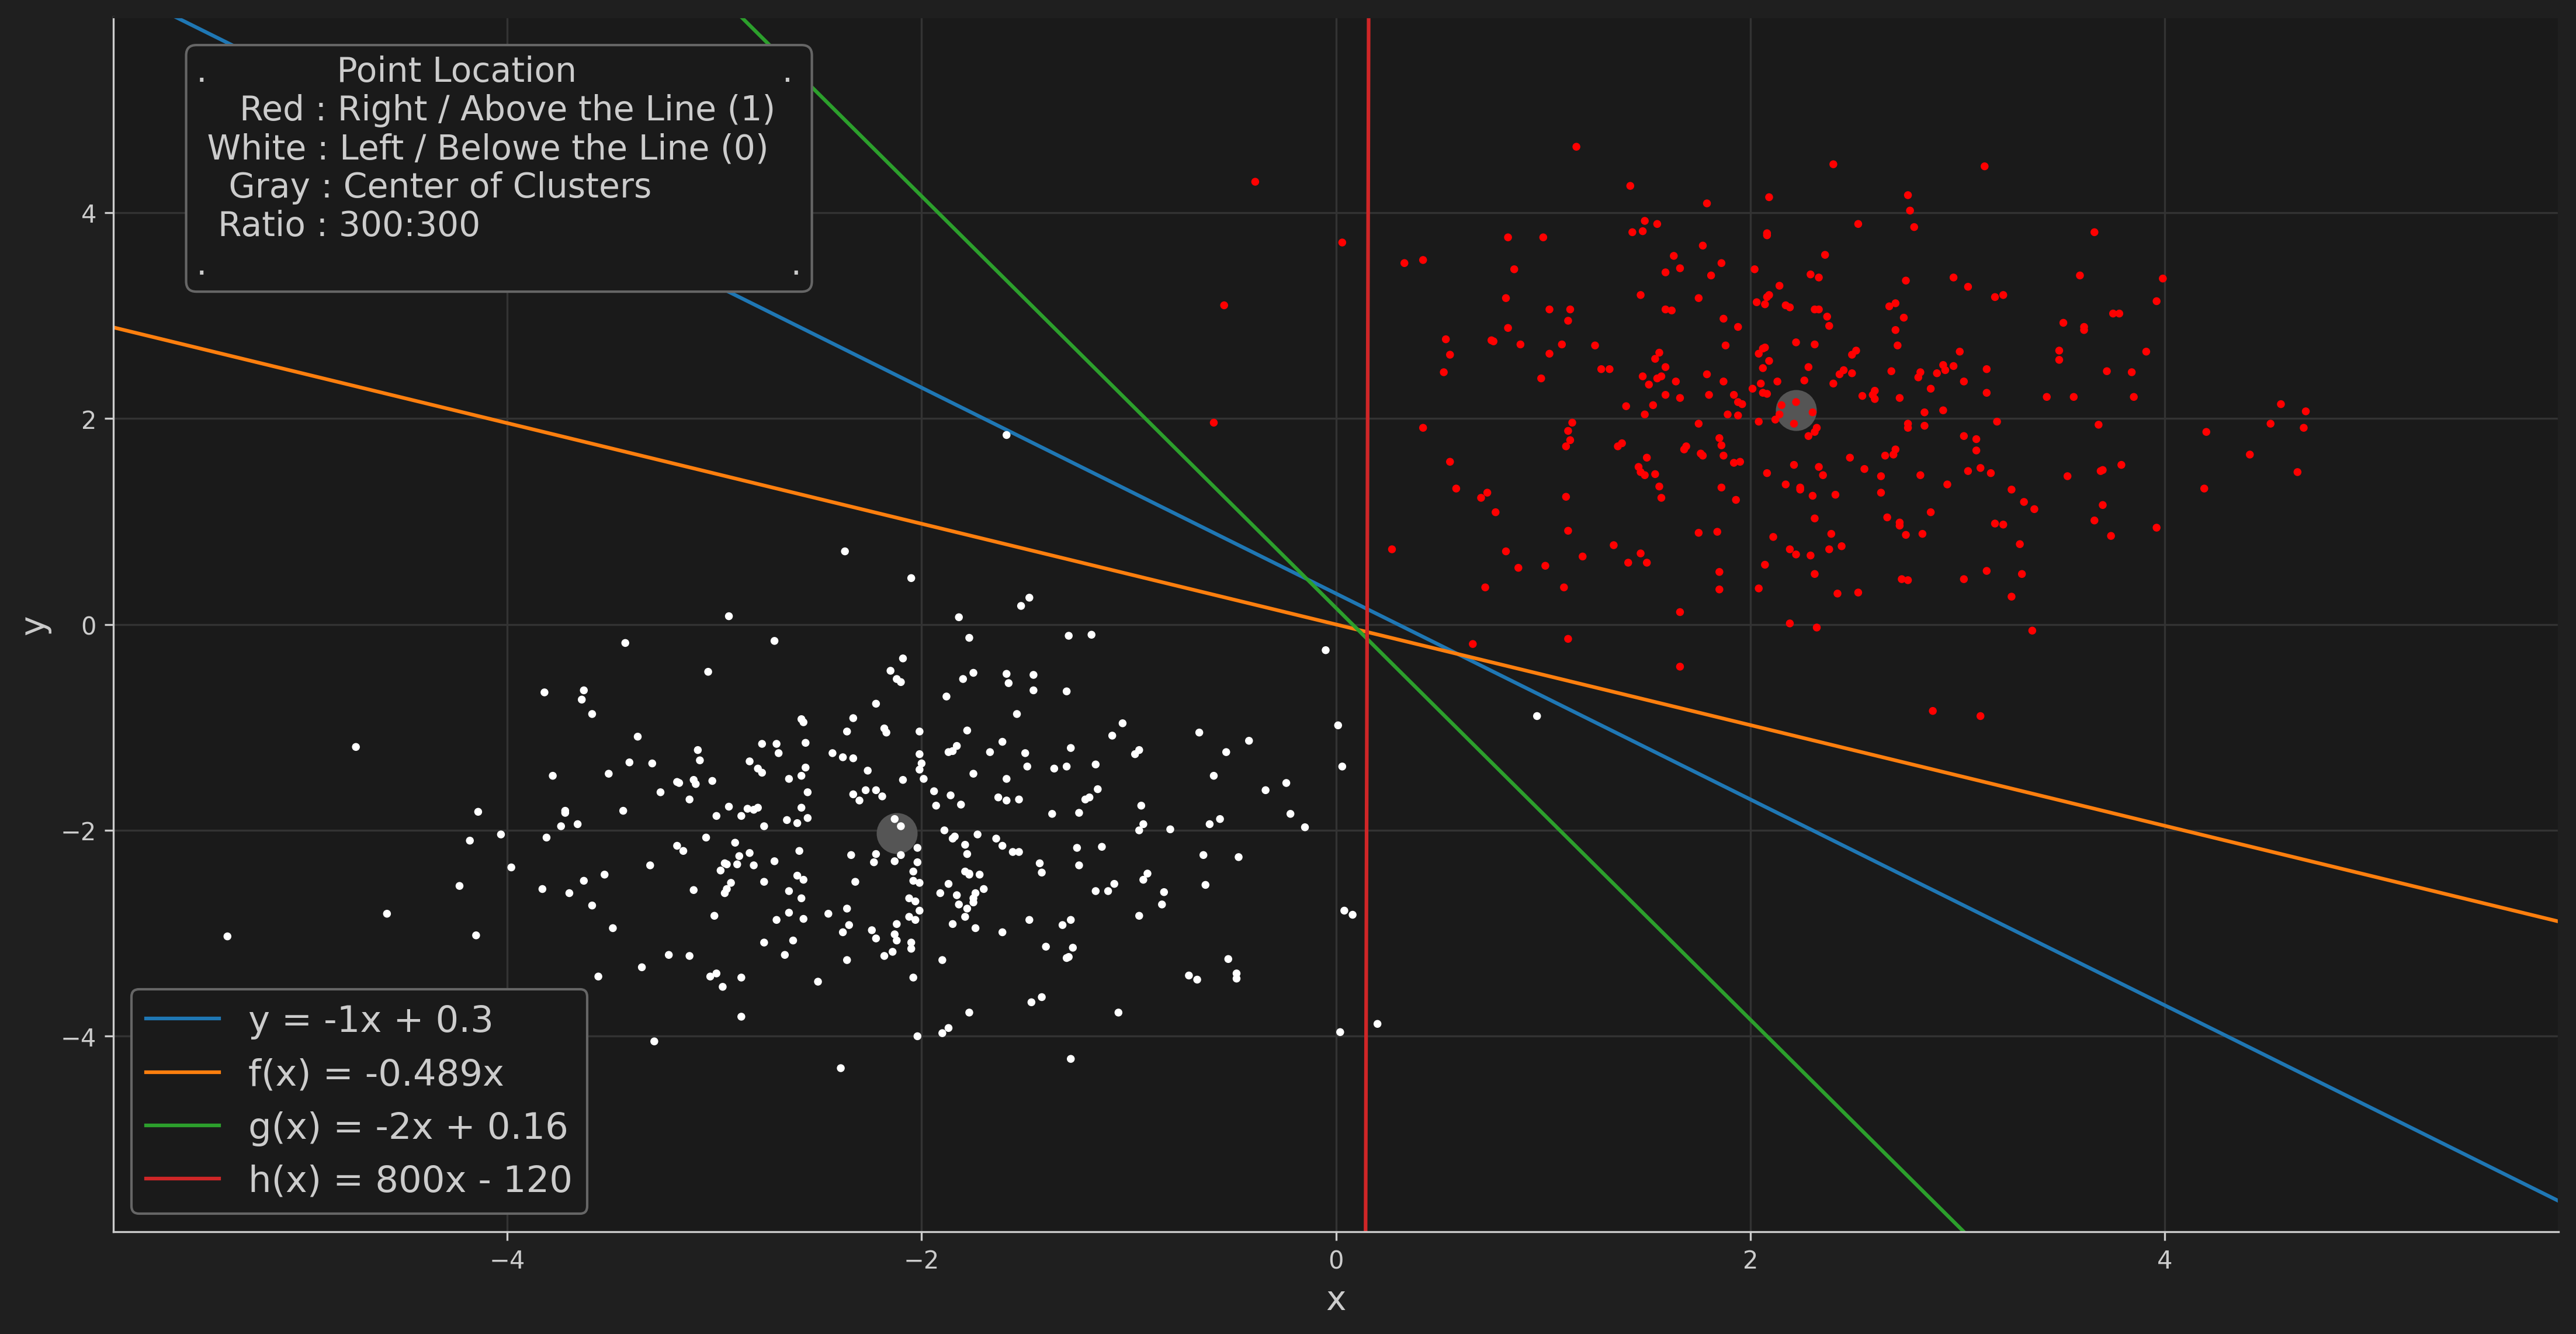

In [31]:

draw_plot( line=lines[0], plot_lines=lines, title="")

### *Plotting <span style="color:#ff7f0e; font-size:22px; font-weight: bold; font-style: italic;"> f(x)</span>*
This cell contains a function that calculates the distance between the blue test point\
and the center of the two clusters in order to illustrate that points can be classified\
as one label while still being closer to the center of a cluster with the opposite lable.


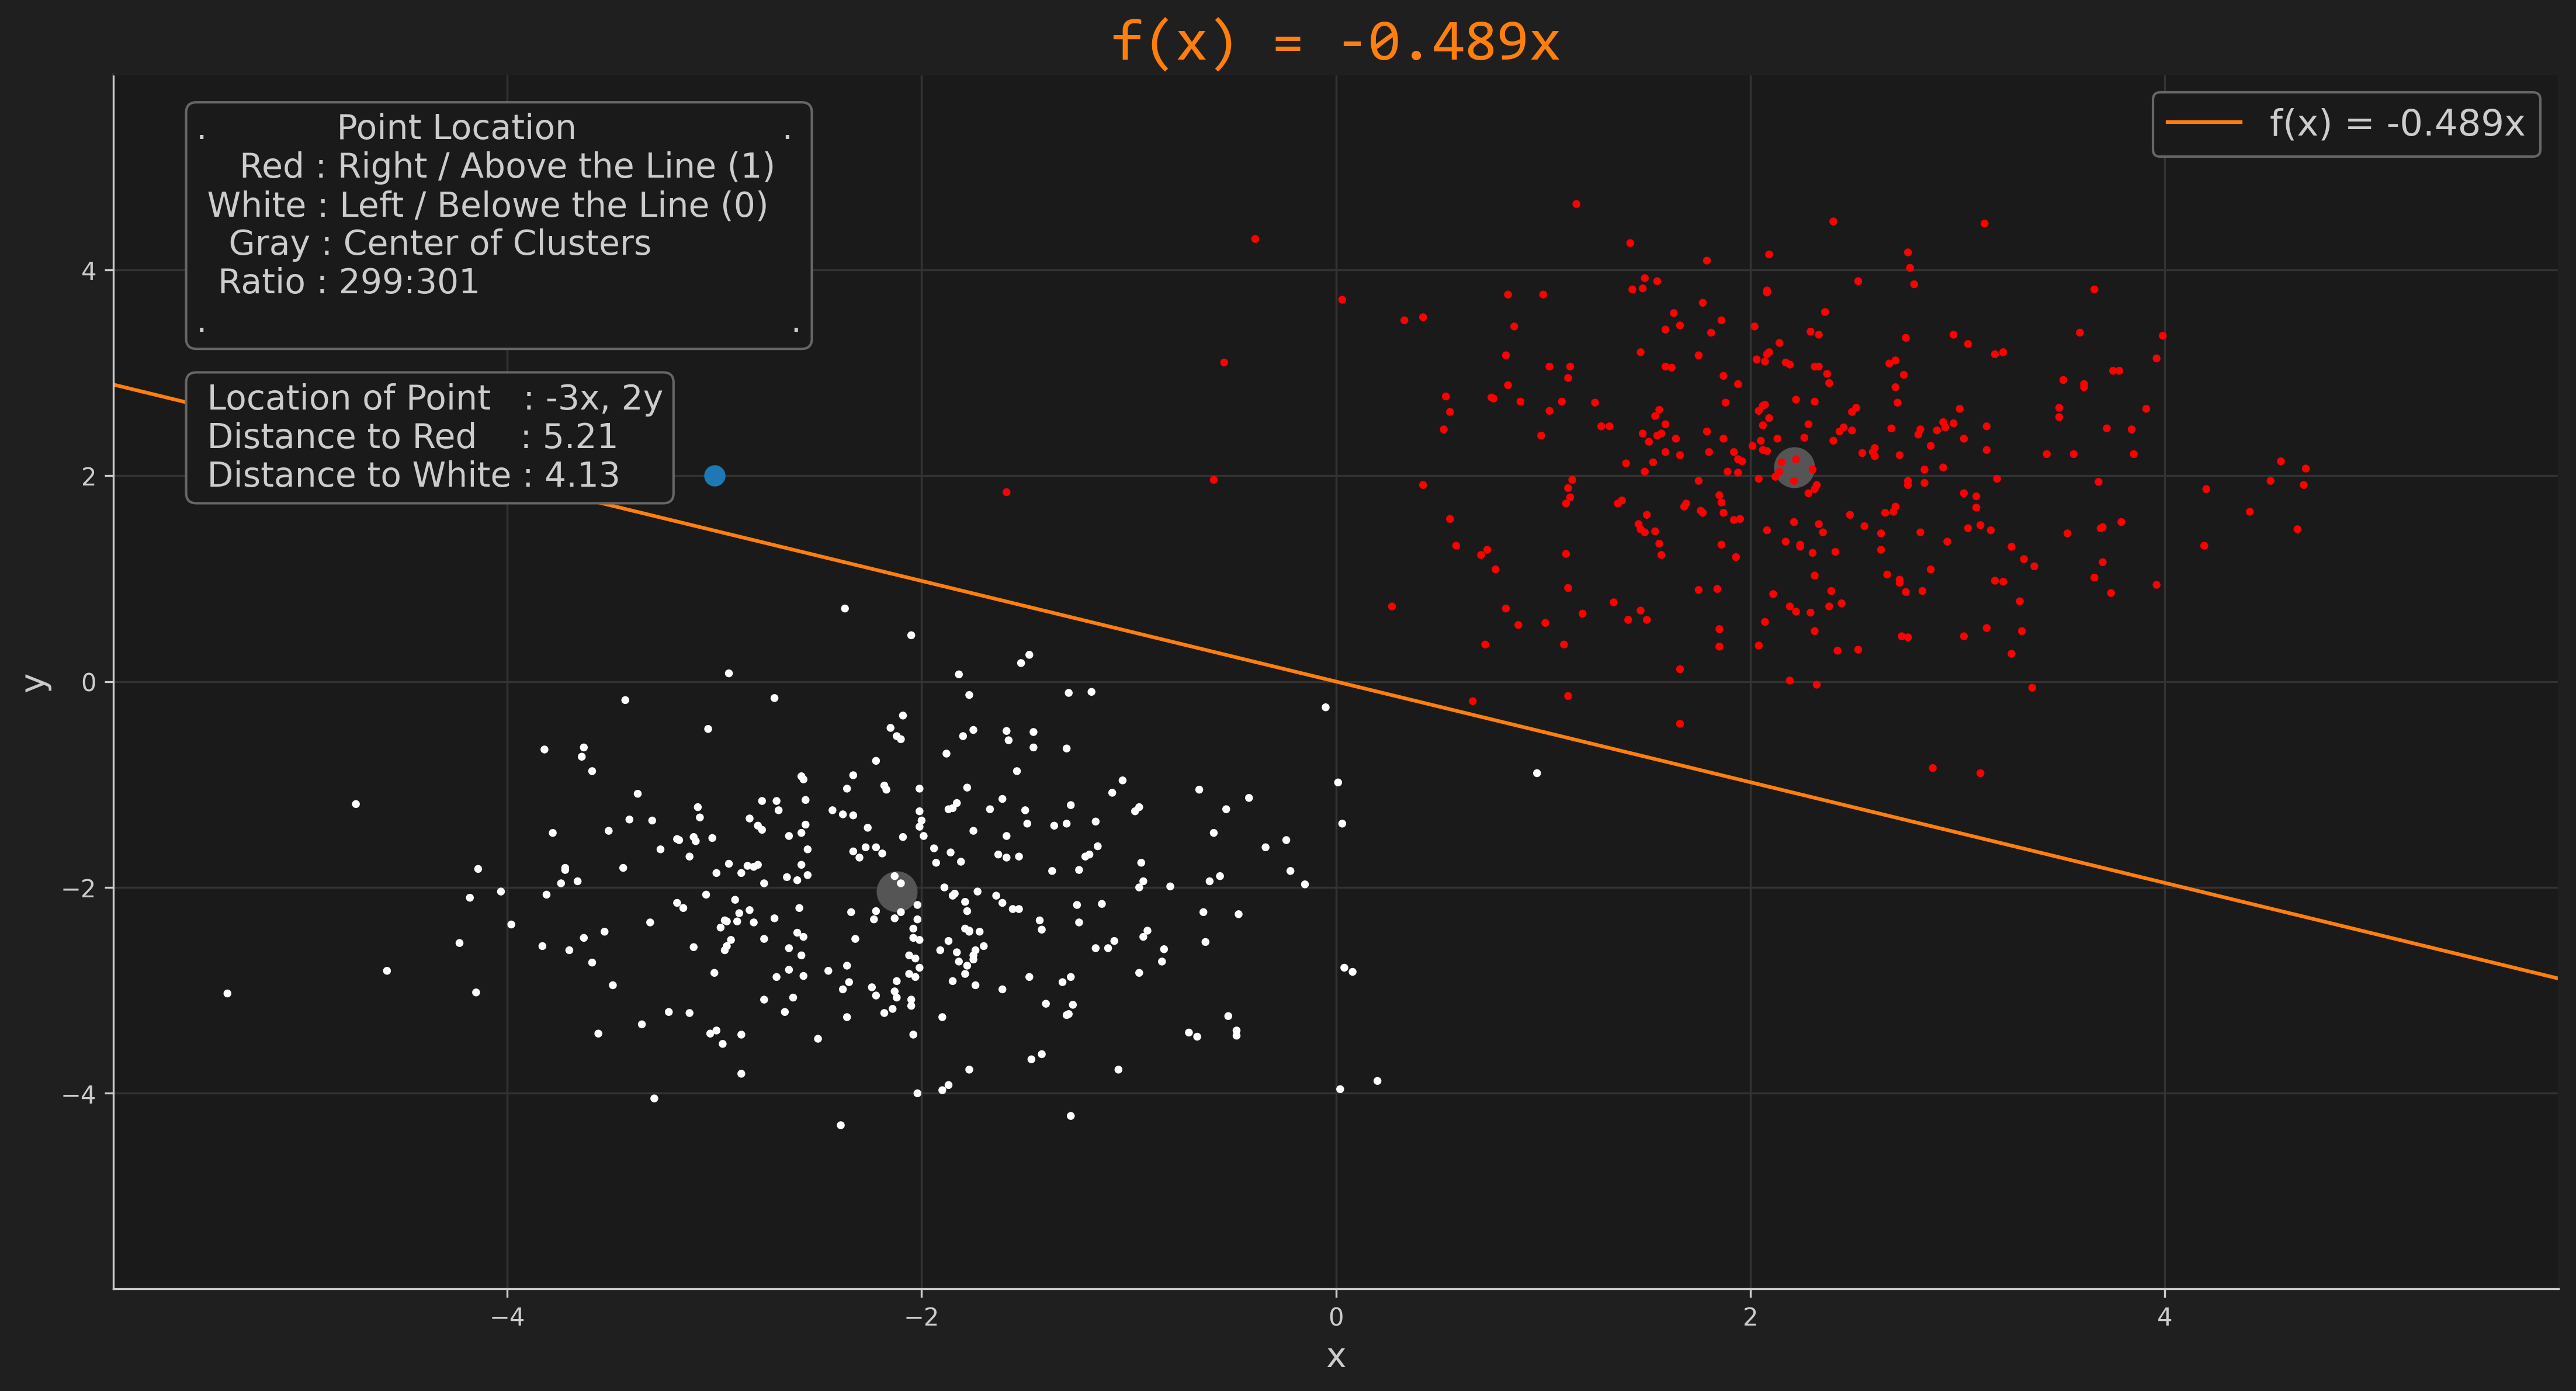

In [32]:
def cluster_distance(line, point):
    distance = dict()
    for key, cluster in line["center_of_clusters"].items():
        x = cluster["x"]
        y = cluster["y"]
        distance[key] = ((x-point["x"])**2 + (y-point["y"])**2)**0.5 
    point["distance"] = distance
    return point

sample_point = cluster_distance(lines[1], {"x":-3, "y":2 }) 

draw_plot( line=lines[1], plot_lines=[lines[1]], title=lines[1]["label"], sample_point=sample_point )


As we can see in the graph above the orange (h) line is getting very close to the top of the white\
cluster and the bottom of the red cluster. The blue test point (-3, 2), as stated in the annotation box,\
is closer to the center of the white cluster but unfortunately it's above the line and would have been\
classified as a red point. 

### *Plotting <span style="color:#cf2627; font-size:22px; font-weight: bold; font-style: italic;"> h(x)</span>*


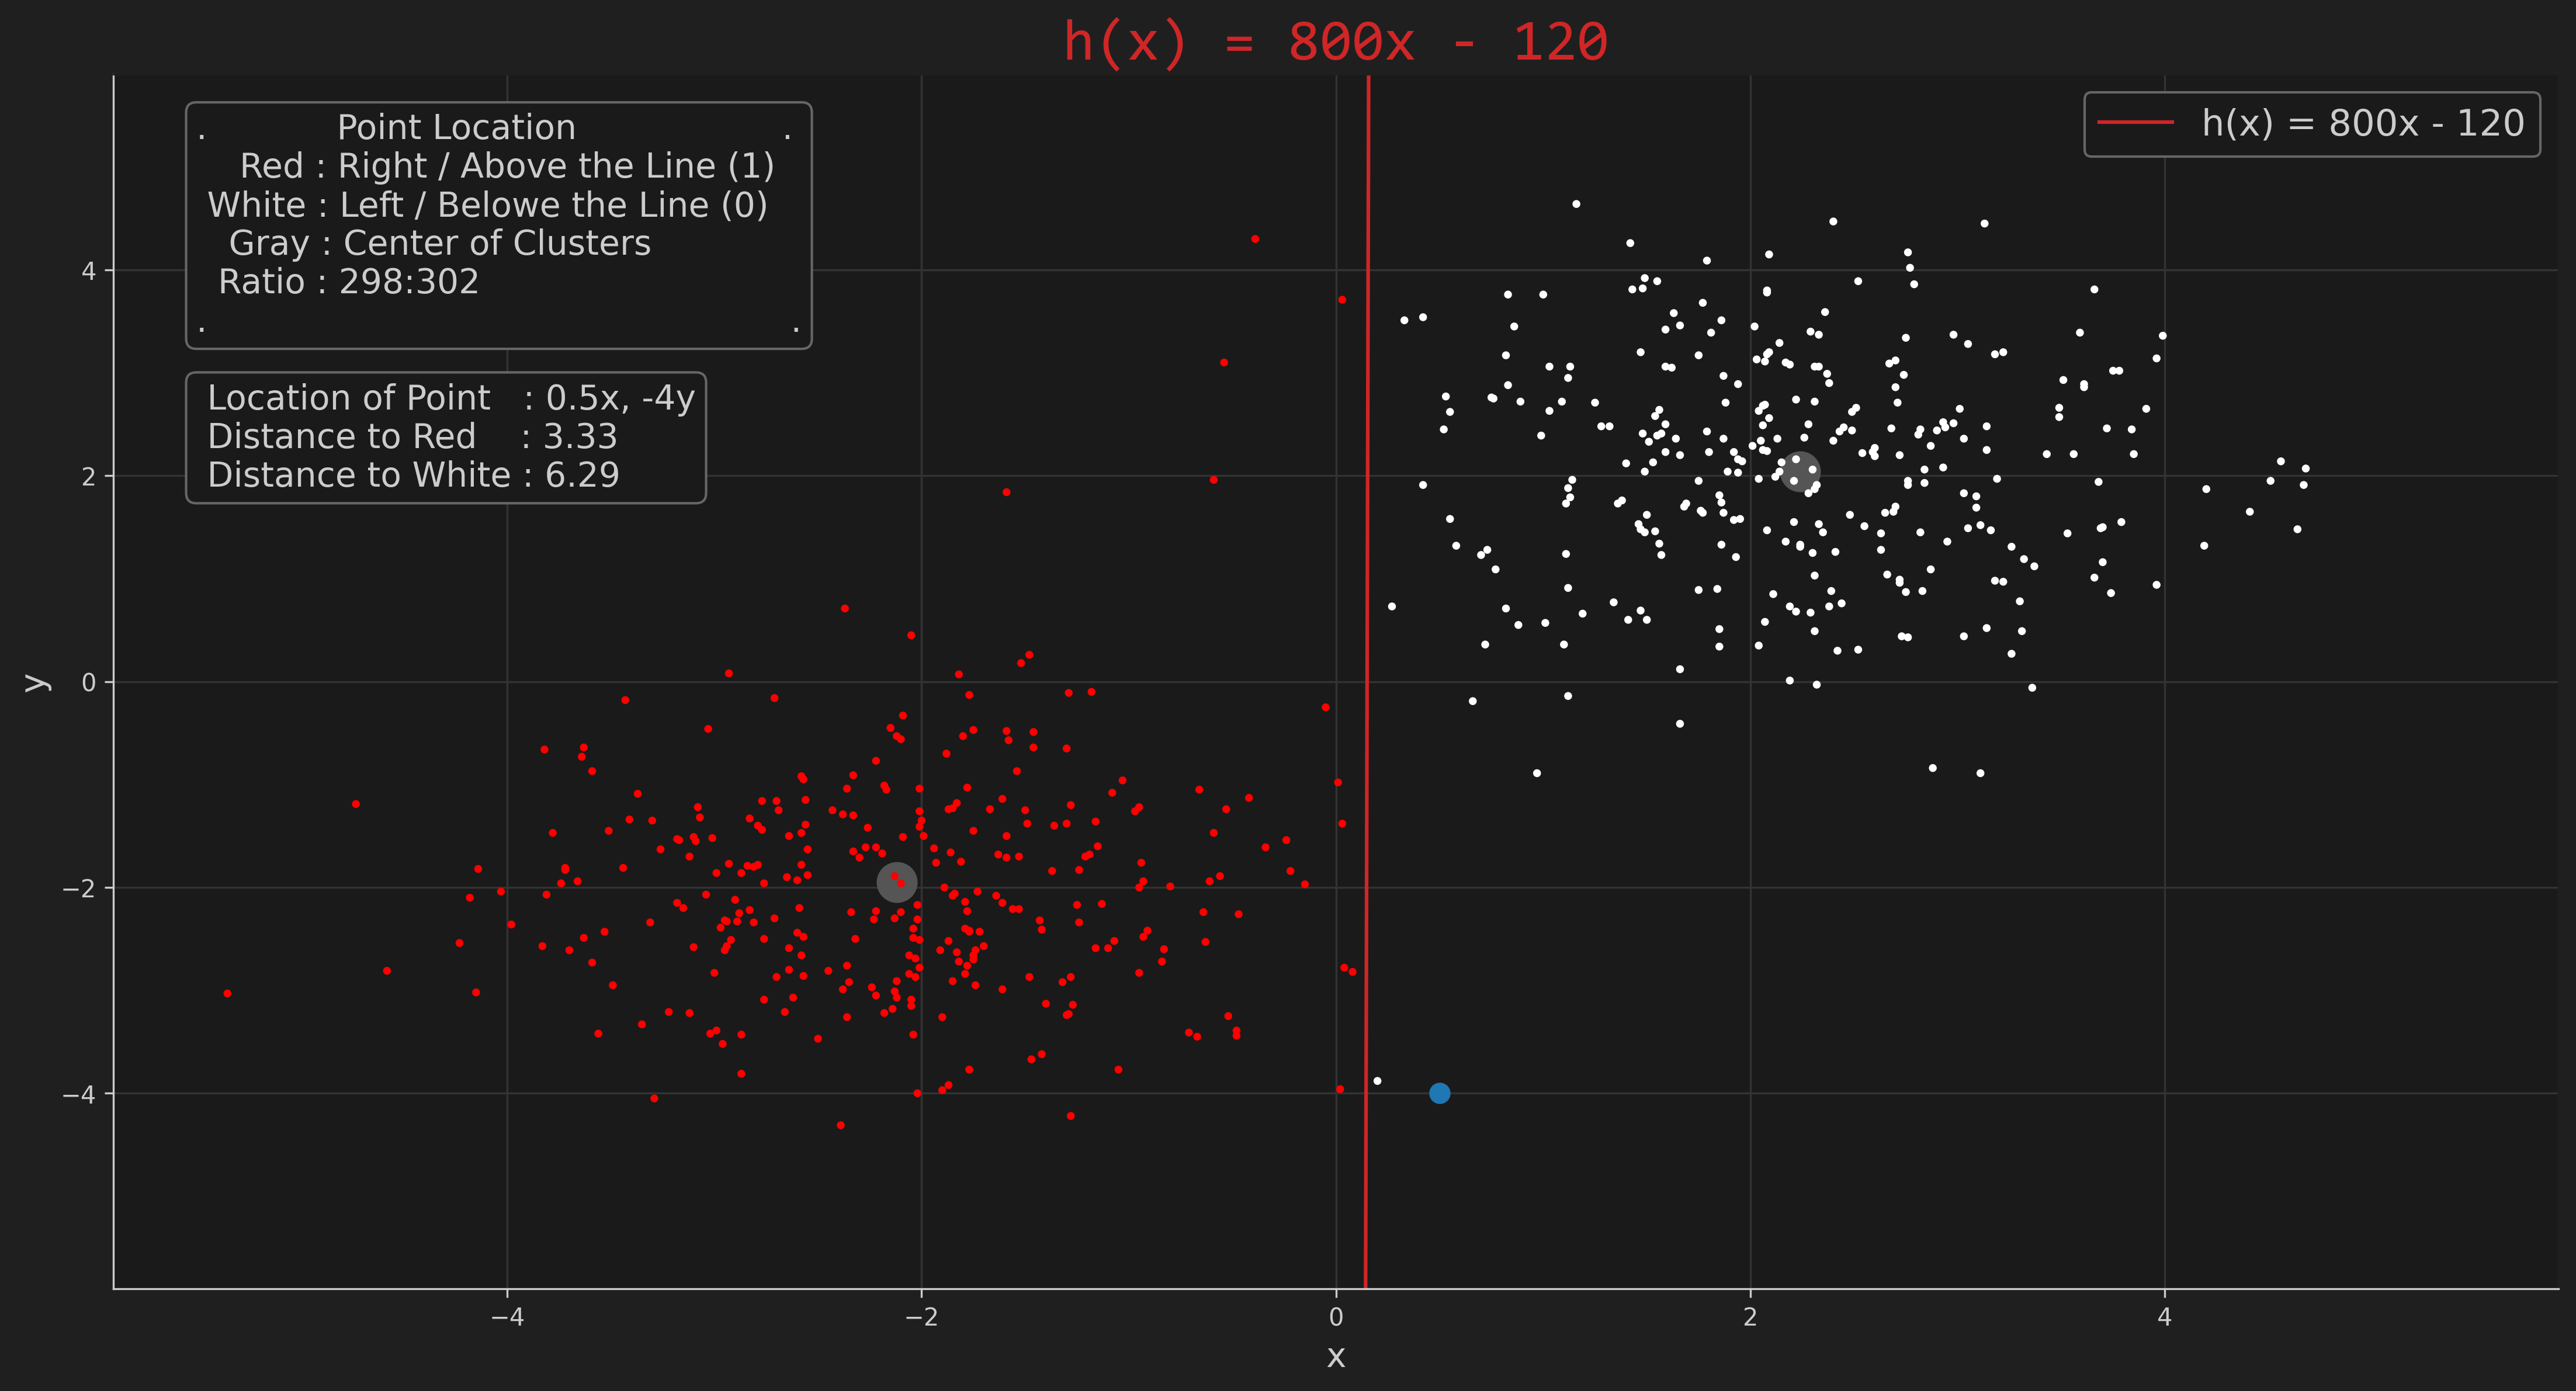

In [33]:
sample_point = cluster_distance(lines[3], {"x":0.5, "y":-4 }) 

draw_plot( line=lines[3], plot_lines=[lines[3]], title=lines[3]["label"], sample_point=sample_point )

h(x) suffers from much the same problem as f(x), when the blue sample point is\
positioned at 0.5x -4y its almost twice as far from the center of the white\
cluster as it is to the red and still the point would have been classified as white.\
\
There is a second problem with this plot, because the k value is both positive and high\
the classification on graph looks wrong, red should be on the right side of the graph\
and white should be on the left. Technically it's still correct because the labeling is from\
the lines point of view so red is still 'above' the line. But this could have been clarified\
by adding for example an arrow  indicate the direction of the line.\
\
Or, I would argue, a better solution would be to set the line to -800k and +120m\
This would place the line at a similar position but keep the labels consistent in\
relation to the graph. 


### *Plotting <span style="color:#2c9f2c; font-size:22px; font-weight: bold; font-style: italic;"> g(x)</span>*


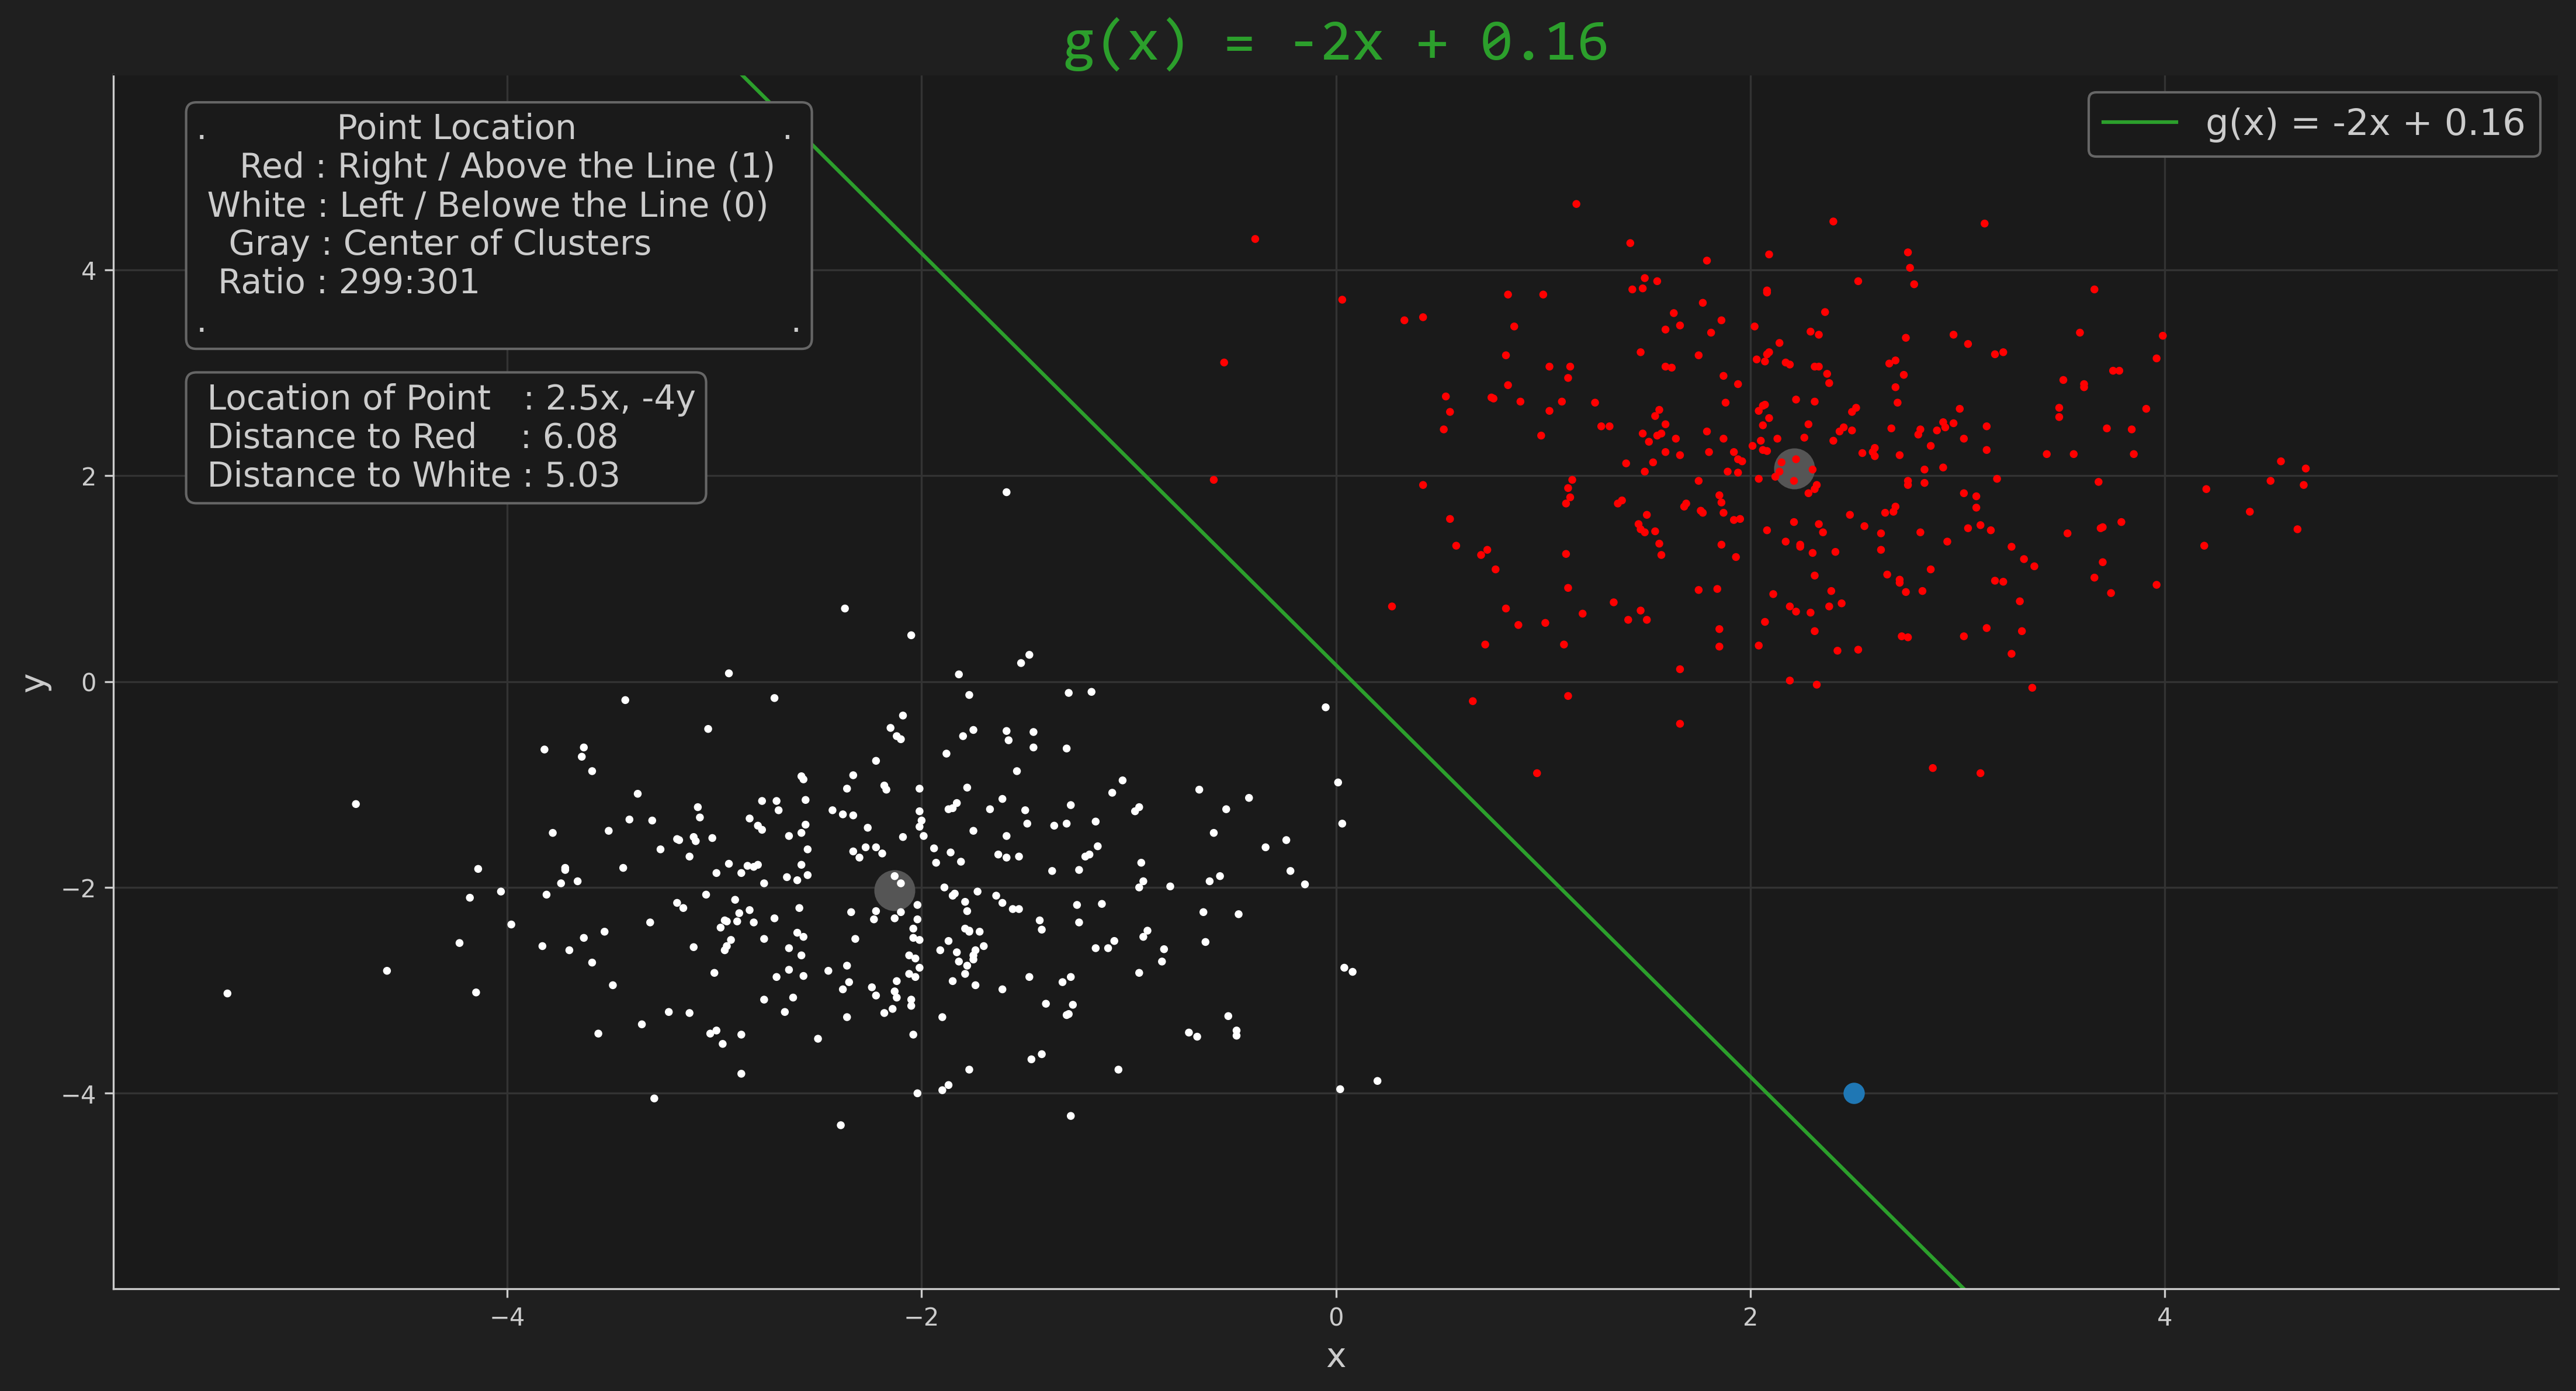

In [34]:
#print(lines[1]["center_of_clusters"])
sample_point = cluster_distance(lines[2], {"x":2.5, "y":-4 }) 


draw_plot( line=lines[2], plot_lines=[lines[2]], title=lines[2]["label"], sample_point=sample_point )

The g(x) line has the same trouble with labeling as the previous two plots,\
as we can see the blue sample point is 20% closer to the center of the wrong cluster.\
Before I implemented the blue test label point I thought the green line would do a\
much better job of keeping the line labeling consistent with the distance from the clusters.\
Although I would still argue that the g(x) still seem to be doing slightly better then f(x)\
in this aspect but I think more testpoints would be needed to confirm this.\
\
Based on these three lines I would draw the conclusion that it might be\
important to nit only focus on dividing the points as evenly as possible,\
as all three lines achieve a near 50/50 split, but also try to put the line\
in between the clusters in such a way as to maintain the distance between the\
line and the cluster as evenly as possible through out the graph in order to\
achieve as good of a classification as possible using this technique.